In [1]:
pip install pykrx


In [2]:
from pykrx import stock

data = stock.get_market_ohlcv_by_date("20200615","20230615","005930")

In [3]:
print(data)

               시가     고가     저가     종가       거래량           거래대금   등락률
날짜                                                                   
2020-06-15  51400  52000  49900  49900  28772921  1468000064800 -4.59
2020-06-16  51200  52100  50600  52100  21808375  1124878770600  4.41
2020-06-17  52100  52900  51300  52200  26672595  1390772012000  0.19
2020-06-18  52200  52300  51600  52300  15982926   830793475311  0.19
2020-06-19  52600  52900  51600  52900  18157985   950404357573  1.15
...           ...    ...    ...    ...       ...            ...   ...
2023-06-09  71100  72300  70800  72000  15050209  1080650065800  1.55
2023-06-12  72100  72400  70800  71000  12064287   861581586290 -1.39
2023-06-13  71700  72200  71600  72000  13227285   950995107900  1.41
2023-06-14  72100  72200  71100  71900  12541046   898255870000 -0.14
2023-06-15  72100  72300  71300  71500  13614994   977638034140 -0.56

[743 rows x 7 columns]


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import traceback

url = 'https://finance.naver.com//item/sise_day.naver?code=005930'
agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36'
response = requests.get(url, headers={'User-Agent': agent})
soup = BeautifulSoup(response.text, 'lxml')
print(response.status_code)
print()

def parse_page(code, start_page, end_page):
    try:
        data_frames = []  # 각 페이지의 데이터프레임을 저장할 리스트

        for page in range(start_page, end_page+1):
            url = 'https://finance.naver.com/item/sise_day.nhn?code={code}&page={page}'.format(code=code, page=page)
            agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36'
            response = requests.get(url=url, headers={'User-Agent': agent})
            soup = BeautifulSoup(response.text, 'html.parser')
            table = soup.find("table")
            if table is not None:
                df = pd.read_html(str(table), header=0)[0]
                df = df.dropna()
                data_frames.append(df)
            else:
                print("테이블을 찾지 못했습니다.")

        if data_frames:
            merged_df = pd.concat(data_frames, ignore_index=True)
            return merged_df
        else:
            print("데이터를 가져올 수 없습니다.")
    except:
        traceback.print_exc()
    return None

code = '005930'  # 주식 코드
start_page = 1  # 시작 페이지
end_page = 50  # 종료 페이지
data = parse_page(code, start_page, end_page)
print(data)

200

             날짜       종가     전일비       시가       고가       저가         거래량
0    2023.06.16  71200.0   300.0  71800.0  71900.0  70900.0   5577025.0
1    2023.06.15  71500.0   400.0  72100.0  72300.0  71300.0  13614994.0
2    2023.06.14  71900.0   100.0  72100.0  72200.0  71100.0  12541046.0
3    2023.06.13  72000.0  1000.0  71700.0  72200.0  71600.0  13227285.0
4    2023.06.12  71000.0  1000.0  72100.0  72400.0  70800.0  12064287.0
..          ...      ...     ...      ...      ...      ...         ...
495  2021.06.15  80900.0   400.0  80900.0  81200.0  80600.0  10075685.0
496  2021.06.14  80500.0   500.0  80800.0  80900.0  80500.0  10550078.0
497  2021.06.11  81000.0     0.0  81200.0  81700.0  80700.0  14087962.0
498  2021.06.10  81000.0   100.0  81300.0  81400.0  80900.0  17586995.0
499  2021.06.09  81100.0   800.0  81500.0  82000.0  81100.0  14908823.0

[500 rows x 7 columns]


In [5]:
data = data.sort_values('날짜')
data

,날짜,종가,전일비,시가,고가,저가,거래량
499,2021.06.09,81100.0,800.0,81500.0,82000.0,81100.0,14908823.0
498,2021.06.10,81000.0,100.0,81300.0,81400.0,80900.0,17586995.0
497,2021.06.11,81000.0,0.0,81200.0,81700.0,80700.0,14087962.0
496,2021.06.14,80500.0,500.0,80800.0,80900.0,80500.0,10550078.0
495,2021.06.15,80900.0,400.0,80900.0,81200.0,80600.0,10075685.0
...,...,...,...,...,...,...,...
4,2023.06.12,71000.0,1000.0,72100.0,72400.0,70800.0,12064287.0
3,2023.06.13,72000.0,1000.0,71700.0,72200.0,71600.0,13227285.0
2,2023.06.14,71900.0,100.0,72100.0,72200.0,71100.0,12541046.0
1,2023.06.15,71500.0,400.0,72100.0,72300.0,71300.0,13614994.0


In [6]:
data = data.dropna()  # 결측치 제거 (추가)
data = data.drop_duplicates()  # 중복값 제거 (추가)

print(data)

             날짜       종가     전일비       시가       고가       저가         거래량
499  2021.06.09  81100.0   800.0  81500.0  82000.0  81100.0  14908823.0
498  2021.06.10  81000.0   100.0  81300.0  81400.0  80900.0  17586995.0
497  2021.06.11  81000.0     0.0  81200.0  81700.0  80700.0  14087962.0
496  2021.06.14  80500.0   500.0  80800.0  80900.0  80500.0  10550078.0
495  2021.06.15  80900.0   400.0  80900.0  81200.0  80600.0  10075685.0
..          ...      ...     ...      ...      ...      ...         ...
4    2023.06.12  71000.0  1000.0  72100.0  72400.0  70800.0  12064287.0
3    2023.06.13  72000.0  1000.0  71700.0  72200.0  71600.0  13227285.0
2    2023.06.14  71900.0   100.0  72100.0  72200.0  71100.0  12541046.0
1    2023.06.15  71500.0   400.0  72100.0  72300.0  71300.0  13614994.0
0    2023.06.16  71200.0   300.0  71800.0  71900.0  70900.0   5577025.0

[500 rows x 7 columns]


In [7]:
data.set_index(data['날짜'],inplace=True,drop=True)
data.drop(['날짜'],inplace=True,axis=1)
data

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
2021.06.09,81100.0,800.0,81500.0,82000.0,81100.0,14908823.0
2021.06.10,81000.0,100.0,81300.0,81400.0,80900.0,17586995.0
2021.06.11,81000.0,0.0,81200.0,81700.0,80700.0,14087962.0
2021.06.14,80500.0,500.0,80800.0,80900.0,80500.0,10550078.0
2021.06.15,80900.0,400.0,80900.0,81200.0,80600.0,10075685.0
...,...,...,...,...,...,...
2023.06.12,71000.0,1000.0,72100.0,72400.0,70800.0,12064287.0
2023.06.13,72000.0,1000.0,71700.0,72200.0,71600.0,13227285.0
2023.06.14,71900.0,100.0,72100.0,72200.0,71100.0,12541046.0


In [8]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import traceback
from sqlalchemy import create_engine

url = 'https://finance.naver.com//item/sise_day.naver?code=005930'
agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36'
response = requests.get(url, headers={'User-Agent': agent})
soup = BeautifulSoup(response.text, 'lxml')
print(response.status_code)
print()

def parse_page(code, start_page, end_page):
    try:
        data_frames = []  # 각 페이지의 데이터프레임을 저장할 리스트

        for page in range(start_page, end_page+1):
            url = 'https://finance.naver.com/item/sise_day.nhn?code={code}&page={page}'.format(code=code, page=page)
            agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36'
            response = requests.get(url=url, headers={'User-Agent': agent})
            soup = BeautifulSoup(response.text, 'html.parser')
            table = soup.find("table")
            if table is not None:
                df = pd.read_html(str(table), header=0)[0]
                df = df.dropna()
                data_frames.append(df)
            else:
                print("테이블을 찾지 못했습니다.")

        if data_frames:
            merged_df = pd.concat(data_frames, ignore_index=True)
            return merged_df
        else:
            print("데이터를 가져올 수 없습니다.")
    except:
        traceback.print_exc()
    return None

code = '005930'  # 주식 코드
start_page = 1  # 시작 페이지
end_page = 50  # 종료 페이지
data = parse_page(code, start_page, end_page)
#print(data)

data = data.sort_values('날짜')

data = data.dropna()  # 결측치 제거 (추가)
data = data.drop_duplicates()  # 중복값 제거 (추가)

print(data)

import psycopg2
#from sqlalchemy import create_engine

# ElephantSQL 연결 정보 설정
host = 'drona.db.elephantsql.com'
user = 'ctmplful'
password = 'gv2Zhl5SuyL7TN0WZTugN-yTcz86FwGC'
database = 'ctmplful'

# ElephantSQL 연결
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}/{database}')
connection = engine.connect()

# 데이터프레임을 ElephantSQL 테이블에 적재
table_name = 'stock_data'  # 테이블명
data.to_sql(name=table_name, con=connection, if_exists='replace', index=False)

# 연결 종료
connection.close()

200

             날짜       종가     전일비       시가       고가       저가         거래량
499  2021.06.09  81100.0   800.0  81500.0  82000.0  81100.0  14908823.0
498  2021.06.10  81000.0   100.0  81300.0  81400.0  80900.0  17586995.0
497  2021.06.11  81000.0     0.0  81200.0  81700.0  80700.0  14087962.0
496  2021.06.14  80500.0   500.0  80800.0  80900.0  80500.0  10550078.0
495  2021.06.15  80900.0   400.0  80900.0  81200.0  80600.0  10075685.0
..          ...      ...     ...      ...      ...      ...         ...
4    2023.06.12  71000.0  1000.0  72100.0  72400.0  70800.0  12064287.0
3    2023.06.13  72000.0  1000.0  71700.0  72200.0  71600.0  13227285.0
2    2023.06.14  71900.0   100.0  72100.0  72200.0  71100.0  12541046.0
1    2023.06.15  71500.0   400.0  72100.0  72300.0  71300.0  13614994.0
0    2023.06.16  71200.0   300.0  71800.0  71900.0  70900.0   5577025.0

[500 rows x 7 columns]


In [ ]:
print(data)

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import traceback
from sqlalchemy import create_engine

url = 'https://finance.naver.com//item/sise_day.naver?code=005930'
agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36'
response = requests.get(url, headers={'User-Agent': agent})
soup = BeautifulSoup(response.text, 'lxml')
print(response.status_code)
print()

def parse_page(code, start_page, end_page):
    try:
        data_frames = []  # 각 페이지의 데이터프레임을 저장할 리스트

        for page in range(start_page, end_page+1):
            url = 'https://finance.naver.com/item/sise_day.nhn?code={code}&page={page}'.format(code=code, page=page)
            agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36'
            response = requests.get(url=url, headers={'User-Agent': agent})
            soup = BeautifulSoup(response.text, 'html.parser')
            table = soup.find("table")
            if table is not None:
                df = pd.read_html(str(table), header=0)[0]
                df = df.dropna()
                data_frames.append(df)
            else:
                print("테이블을 찾지 못했습니다.")

        if data_frames:
            merged_df = pd.concat(data_frames, ignore_index=True)
            return merged_df
        else:
            print("데이터를 가져올 수 없습니다.")
    except:
        traceback.print_exc()
    return None

code = '005930'  # 주식 코드
start_page = 1  # 시작 페이지
end_page = 50  # 종료 페이지
data = parse_page(code, start_page, end_page)
#print(data)

data = data.sort_values('날짜')

data = data.dropna()  # 결측치 제거 (추가)
data = data.drop_duplicates()  # 중복값 제거 (추가)

print(data)


200

             날짜       종가     전일비       시가       고가       저가         거래량
499  2021.06.09  81100.0   800.0  81500.0  82000.0  81100.0  14908823.0
498  2021.06.10  81000.0   100.0  81300.0  81400.0  80900.0  17586995.0
497  2021.06.11  81000.0     0.0  81200.0  81700.0  80700.0  14087962.0
496  2021.06.14  80500.0   500.0  80800.0  80900.0  80500.0  10550078.0
495  2021.06.15  80900.0   400.0  80900.0  81200.0  80600.0  10075685.0
..          ...      ...     ...      ...      ...      ...         ...
4    2023.06.12  71000.0  1000.0  72100.0  72400.0  70800.0  12064287.0
3    2023.06.13  72000.0  1000.0  71700.0  72200.0  71600.0  13227285.0
2    2023.06.14  71900.0   100.0  72100.0  72200.0  71100.0  12541046.0
1    2023.06.15  71500.0   400.0  72100.0  72300.0  71300.0  13614994.0
0    2023.06.16  71200.0   300.0  71800.0  71900.0  70900.0   5634712.0

[500 rows x 7 columns]


In [7]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
import matplotlib.pyplot as plt


In [9]:
date_list = data['날짜'].tolist()
print(date_list)

['2021.06.09', '2021.06.10', '2021.06.11', '2021.06.14', '2021.06.15', '2021.06.16', '2021.06.17', '2021.06.18', '2021.06.21', '2021.06.22', '2021.06.23', '2021.06.24', '2021.06.25', '2021.06.28', '2021.06.29', '2021.06.30', '2021.07.01', '2021.07.02', '2021.07.05', '2021.07.06', '2021.07.07', '2021.07.08', '2021.07.09', '2021.07.12', '2021.07.13', '2021.07.14', '2021.07.15', '2021.07.16', '2021.07.19', '2021.07.20', '2021.07.21', '2021.07.22', '2021.07.23', '2021.07.26', '2021.07.27', '2021.07.28', '2021.07.29', '2021.07.30', '2021.08.02', '2021.08.03', '2021.08.04', '2021.08.05', '2021.08.06', '2021.08.09', '2021.08.10', '2021.08.11', '2021.08.12', '2021.08.13', '2021.08.17', '2021.08.18', '2021.08.19', '2021.08.20', '2021.08.23', '2021.08.24', '2021.08.25', '2021.08.26', '2021.08.27', '2021.08.30', '2021.08.31', '2021.09.01', '2021.09.02', '2021.09.03', '2021.09.06', '2021.09.07', '2021.09.08', '2021.09.09', '2021.09.10', '2021.09.13', '2021.09.14', '2021.09.15', '2021.09.16', '2021

In [10]:
date_list = data['종가'].tolist()
print(date_list)

[81100.0, 81000.0, 81000.0, 80500.0, 80900.0, 81800.0, 80900.0, 80500.0, 79900.0, 80000.0, 80100.0, 81200.0, 81600.0, 81900.0, 81000.0, 80700.0, 80100.0, 80000.0, 80400.0, 81200.0, 80800.0, 79900.0, 79400.0, 79700.0, 79800.0, 79500.0, 80600.0, 79800.0, 79000.0, 79000.0, 78500.0, 79700.0, 79300.0, 78800.0, 78500.0, 79200.0, 79000.0, 78500.0, 79300.0, 81400.0, 82900.0, 82100.0, 81500.0, 81500.0, 80200.0, 78500.0, 77000.0, 74400.0, 74200.0, 73900.0, 73100.0, 72700.0, 73300.0, 75600.0, 75700.0, 74600.0, 74300.0, 74600.0, 76700.0, 76800.0, 76000.0, 76600.0, 77300.0, 76100.0, 76300.0, 75300.0, 75300.0, 76300.0, 76600.0, 77000.0, 76100.0, 77200.0, 77400.0, 77300.0, 77700.0, 76300.0, 74100.0, 74100.0, 73200.0, 72200.0, 71300.0, 71600.0, 71500.0, 69000.0, 68800.0, 69400.0, 70100.0, 70200.0, 70600.0, 70300.0, 70200.0, 70400.0, 70200.0, 71100.0, 70100.0, 70700.0, 69800.0, 69900.0, 71500.0, 70400.0, 70600.0, 70200.0, 70600.0, 70500.0, 70200.0, 69900.0, 70600.0, 71400.0, 71300.0, 70700.0, 70200.0, 

In [11]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
import matplotlib.pyplot as plt

# 데이터 로딩
data = pd.DataFrame({
    '날짜': ['2021.06.09', '2021.06.10', '2021.06.11', '2021.06.14', '2021.06.15', '2021.06.16', '2021.06.17', '2021.06.18', '2021.06.21', '2021.06.22', '2021.06.23', '2021.06.24', '2021.06.25', '2021.06.28', '2021.06.29', '2021.06.30', '2021.07.01', '2021.07.02', '2021.07.05', '2021.07.06', '2021.07.07', '2021.07.08', '2021.07.09', '2021.07.12', '2021.07.13', '2021.07.14', '2021.07.15', '2021.07.16', '2021.07.19', '2021.07.20', '2021.07.21', '2021.07.22', '2021.07.23', '2021.07.26', '2021.07.27', '2021.07.28', '2021.07.29', '2021.07.30', '2021.08.02', '2021.08.03', '2021.08.04', '2021.08.05', '2021.08.06', '2021.08.09', '2021.08.10', '2021.08.11', '2021.08.12', '2021.08.13', '2021.08.17', '2021.08.18', '2021.08.19', '2021.08.20', '2021.08.23', '2021.08.24', '2021.08.25', '2021.08.26', '2021.08.27', '2021.08.30', '2021.08.31', '2021.09.01', '2021.09.02', '2021.09.03', '2021.09.06', '2021.09.07', '2021.09.08', '2021.09.09', '2021.09.10', '2021.09.13', '2021.09.14', '2021.09.15', '2021.09.16', '2021.09.17', '2021.09.23', '2021.09.24', '2021.09.27', '2021.09.28', '2021.09.29', '2021.09.30', '2021.10.01', '2021.10.05', '2021.10.06', '2021.10.07', '2021.10.08', '2021.10.12', '2021.10.13', '2021.10.14', '2021.10.15', '2021.10.18', '2021.10.19', '2021.10.20', '2021.10.21', '2021.10.22', '2021.10.25', '2021.10.26', '2021.10.27', '2021.10.28', '2021.10.29', '2021.11.01', '2021.11.02', '2021.11.03', '2021.11.04', '2021.11.05', '2021.11.08', '2021.11.09', '2021.11.10', '2021.11.11', '2021.11.12', '2021.11.15', '2021.11.16', '2021.11.17', '2021.11.18', '2021.11.19', '2021.11.22', '2021.11.23', '2021.11.24', '2021.11.25', '2021.11.26', '2021.11.29', '2021.11.30', '2021.12.01', '2021.12.02', '2021.12.03', '2021.12.06', '2021.12.07', '2021.12.08', '2021.12.09', '2021.12.10', '2021.12.13', '2021.12.14', '2021.12.15', '2021.12.16', '2021.12.17', '2021.12.20', '2021.12.21', '2021.12.22', '2021.12.23', '2021.12.24', '2021.12.27', '2021.12.28', '2021.12.29', '2021.12.30', '2022.01.03', '2022.01.04', '2022.01.05', '2022.01.06', '2022.01.07', '2022.01.10', '2022.01.11', '2022.01.12', '2022.01.13', '2022.01.14', '2022.01.17', '2022.01.18', '2022.01.19', '2022.01.20', '2022.01.21', '2022.01.24', '2022.01.25', '2022.01.26', '2022.01.27', '2022.01.28', '2022.02.03', '2022.02.04', '2022.02.07', '2022.02.08', '2022.02.09', '2022.02.10', '2022.02.11', '2022.02.14', '2022.02.15', '2022.02.16', '2022.02.17', '2022.02.18', '2022.02.21', '2022.02.22', '2022.02.23', '2022.02.24', '2022.02.25', '2022.02.28', '2022.03.02', '2022.03.03', '2022.03.04', '2022.03.07', '2022.03.08', '2022.03.10', '2022.03.11', '2022.03.14', '2022.03.15', '2022.03.16', '2022.03.17', '2022.03.18', '2022.03.21', '2022.03.22', '2022.03.23', '2022.03.24', '2022.03.25', '2022.03.28', '2022.03.29', '2022.03.30', '2022.03.31', '2022.04.01', '2022.04.04', '2022.04.05', '2022.04.06', '2022.04.07', '2022.04.08', '2022.04.11', '2022.04.12', '2022.04.13', '2022.04.14', '2022.04.15', '2022.04.18', '2022.04.19', '2022.04.20', '2022.04.21', '2022.04.22', '2022.04.25', '2022.04.26', '2022.04.27', '2022.04.28', '2022.04.29', '2022.05.02', '2022.05.03', '2022.05.04', '2022.05.06', '2022.05.09', '2022.05.10', '2022.05.11', '2022.05.12', '2022.05.13', '2022.05.16', '2022.05.17', '2022.05.18', '2022.05.19', '2022.05.20', '2022.05.23', '2022.05.24', '2022.05.25', '2022.05.26', '2022.05.27', '2022.05.30', '2022.05.31', '2022.06.02', '2022.06.03', '2022.06.07', '2022.06.08', '2022.06.09', '2022.06.10', '2022.06.13', '2022.06.14', '2022.06.15', '2022.06.16', '2022.06.17', '2022.06.20', '2022.06.21', '2022.06.22', '2022.06.23', '2022.06.24', '2022.06.27', '2022.06.28', '2022.06.29', '2022.06.30', '2022.07.01', '2022.07.04', '2022.07.05', '2022.07.06', '2022.07.07', '2022.07.08', '2022.07.11', '2022.07.12', '2022.07.13', '2022.07.14', '2022.07.15', '2022.07.18', '2022.07.19', '2022.07.20', '2022.07.21', '2022.07.22', '2022.07.25', '2022.07.26', '2022.07.27', '2022.07.28', '2022.07.29', '2022.08.01', '2022.08.02', '2022.08.03', '2022.08.04', '2022.08.05', '2022.08.08', '2022.08.09', '2022.08.10', '2022.08.11', '2022.08.12', '2022.08.16', '2022.08.17', '2022.08.18', '2022.08.19', '2022.08.22', '2022.08.23', '2022.08.24', '2022.08.25', '2022.08.26', '2022.08.29', '2022.08.30', '2022.08.31', '2022.09.01', '2022.09.02', '2022.09.05', '2022.09.06', '2022.09.07', '2022.09.08', '2022.09.13', '2022.09.14', '2022.09.15', '2022.09.16', '2022.09.19', '2022.09.20', '2022.09.21', '2022.09.22', '2022.09.23', '2022.09.26', '2022.09.27', '2022.09.28', '2022.09.29', '2022.09.30', '2022.10.04', '2022.10.05', '2022.10.06', '2022.10.07', '2022.10.11', '2022.10.12', '2022.10.13', '2022.10.14', '2022.10.17', '2022.10.18', '2022.10.19', '2022.10.20', '2022.10.21', '2022.10.24', '2022.10.25', '2022.10.26', '2022.10.27', '2022.10.28', '2022.10.31', '2022.11.01', '2022.11.02', '2022.11.03', '2022.11.04', '2022.11.07', '2022.11.08', '2022.11.09', '2022.11.10', '2022.11.11', '2022.11.14', '2022.11.15', '2022.11.16', '2022.11.17', '2022.11.18', '2022.11.21', '2022.11.22', '2022.11.23', '2022.11.24', '2022.11.25', '2022.11.28', '2022.11.29', '2022.11.30', '2022.12.01', '2022.12.02', '2022.12.05', '2022.12.06', '2022.12.07', '2022.12.08', '2022.12.09', '2022.12.12', '2022.12.13', '2022.12.14', '2022.12.15', '2022.12.16', '2022.12.19', '2022.12.20', '2022.12.21', '2022.12.22', '2022.12.23', '2022.12.26', '2022.12.27', '2022.12.28', '2022.12.29', '2023.01.02', '2023.01.03', '2023.01.04', '2023.01.05', '2023.01.06', '2023.01.09', '2023.01.10', '2023.01.11', '2023.01.12', '2023.01.13', '2023.01.16', '2023.01.17', '2023.01.18', '2023.01.19', '2023.01.20', '2023.01.25', '2023.01.26', '2023.01.27', '2023.01.30', '2023.01.31', '2023.02.01', '2023.02.02', '2023.02.03', '2023.02.06', '2023.02.07', '2023.02.08', '2023.02.09', '2023.02.10', '2023.02.13', '2023.02.14', '2023.02.15', '2023.02.16', '2023.02.17', '2023.02.20', '2023.02.21', '2023.02.22', '2023.02.23', '2023.02.24', '2023.02.27', '2023.02.28', '2023.03.02', '2023.03.03', '2023.03.06', '2023.03.07', '2023.03.08', '2023.03.09', '2023.03.10', '2023.03.13', '2023.03.14', '2023.03.15', '2023.03.16', '2023.03.17', '2023.03.20', '2023.03.21', '2023.03.22', '2023.03.23', '2023.03.24', '2023.03.27', '2023.03.28', '2023.03.29', '2023.03.30', '2023.03.31', '2023.04.03', '2023.04.04', '2023.04.05', '2023.04.06', '2023.04.07', '2023.04.10', '2023.04.11', '2023.04.12', '2023.04.13', '2023.04.14', '2023.04.17', '2023.04.18', '2023.04.19', '2023.04.20', '2023.04.21', '2023.04.24', '2023.04.25', '2023.04.26', '2023.04.27', '2023.04.28', '2023.05.02', '2023.05.03', '2023.05.04', '2023.05.08', '2023.05.09', '2023.05.10', '2023.05.11', '2023.05.12', '2023.05.15', '2023.05.16', '2023.05.17', '2023.05.18', '2023.05.19', '2023.05.22', '2023.05.23', '2023.05.24', '2023.05.25', '2023.05.26', '2023.05.30', '2023.05.31', '2023.06.01', '2023.06.02', '2023.06.05', '2023.06.07', '2023.06.08', '2023.06.09', '2023.06.12', '2023.06.13', '2023.06.14', '2023.06.15', '2023.06.16'],
    '종가': [81100.0, 81000.0, 81000.0, 80500.0, 80900.0, 81800.0, 80900.0, 80500.0, 79900.0, 80000.0, 80100.0, 81200.0, 81600.0, 81900.0, 81000.0, 80700.0, 80100.0, 80000.0, 80400.0, 81200.0, 80800.0, 79900.0, 79400.0, 79700.0, 79800.0, 79500.0, 80600.0, 79800.0, 79000.0, 79000.0, 78500.0, 79700.0, 79300.0, 78800.0, 78500.0, 79200.0, 79000.0, 78500.0, 79300.0, 81400.0, 82900.0, 82100.0, 81500.0, 81500.0, 80200.0, 78500.0, 77000.0, 74400.0, 74200.0, 73900.0, 73100.0, 72700.0, 73300.0, 75600.0, 75700.0, 74600.0, 74300.0, 74600.0, 76700.0, 76800.0, 76000.0, 76600.0, 77300.0, 76100.0, 76300.0, 75300.0, 75300.0, 76300.0, 76600.0, 77000.0, 76100.0, 77200.0, 77400.0, 77300.0, 77700.0, 76300.0, 74100.0, 74100.0, 73200.0, 72200.0, 71300.0, 71600.0, 71500.0, 69000.0, 68800.0, 69400.0, 70100.0, 70200.0, 70600.0, 70300.0, 70200.0, 70400.0, 70200.0, 71100.0, 70100.0, 70700.0, 69800.0, 69900.0, 71500.0, 70400.0, 70600.0, 70200.0, 70600.0, 70500.0, 70200.0, 69900.0, 70600.0, 71400.0, 71300.0, 70700.0, 70200.0, 71200.0, 74900.0, 75300.0, 74800.0, 73700.0, 72300.0, 72300.0, 71300.0, 74400.0, 75800.0, 75600.0, 76300.0, 77400.0, 77400.0, 78200.0, 76900.0, 76800.0, 77000.0, 77600.0, 77800.0, 78000.0, 77100.0, 78100.0, 79400.0, 79900.0, 80500.0, 80200.0, 80300.0, 78800.0, 78300.0, 78600.0, 78700.0, 77400.0, 76900.0, 78300.0, 78000.0, 78900.0, 78900.0, 77900.0, 77300.0, 77500.0, 77000.0, 76300.0, 76500.0, 75600.0, 75100.0, 74000.0, 73300.0, 71300.0, 73300.0, 73300.0, 74000.0, 73000.0, 73500.0, 74700.0, 75400.0, 74900.0, 73700.0, 73700.0, 74800.0, 75000.0, 74300.0, 74200.0, 73400.0, 73000.0, 71500.0, 71900.0, 72100.0, 71700.0, 72900.0, 71500.0, 70100.0, 69500.0, 71200.0, 70000.0, 70200.0, 69500.0, 70400.0, 71200.0, 70700.0, 69900.0, 70300.0, 70500.0, 69800.0, 69800.0, 69700.0, 70200.0, 69900.0, 69600.0, 69100.0, 69300.0, 69200.0, 68500.0, 68000.0, 67800.0, 67900.0, 67000.0, 68700.0, 67500.0, 66600.0, 66700.0, 67300.0, 67400.0, 67700.0, 67000.0, 66300.0, 66100.0, 65000.0, 64800.0, 67400.0, 67300.0, 67500.0, 67900.0, 66500.0, 66100.0, 65700.0, 65700.0, 64900.0, 66500.0, 66300.0, 67600.0, 68100.0, 67500.0, 68000.0, 67900.0, 66500.0, 66400.0, 65900.0, 66500.0, 67700.0, 67400.0, 66700.0, 66800.0, 65500.0, 65300.0, 65200.0, 63800.0, 62100.0, 61900.0, 60700.0, 60900.0, 59800.0, 58700.0, 58500.0, 57600.0, 57400.0, 58400.0, 58800.0, 59400.0, 58000.0, 57000.0, 56200.0, 57100.0, 57200.0, 56400.0, 58200.0, 58700.0, 58800.0, 58100.0, 58000.0, 57500.0, 60000.0, 61900.0, 60900.0, 60500.0, 61800.0, 61300.0, 61100.0, 61700.0, 61800.0, 61900.0, 61400.0, 61300.0, 61700.0, 61300.0, 61500.0, 61500.0, 60800.0, 60000.0, 59100.0, 59900.0, 60200.0, 61000.0, 60400.0, 61500.0, 60900.0, 60000.0, 59100.0, 59000.0, 59700.0, 60000.0, 58600.0, 58800.0, 59700.0, 58400.0, 57500.0, 57100.0, 57100.0, 56000.0, 55600.0, 58100.0, 56800.0, 56000.0, 56200.0, 56400.0, 55800.0, 55300.0, 54400.0, 54500.0, 53900.0, 54200.0, 52900.0, 52600.0, 53100.0, 55200.0, 56000.0, 56300.0, 56200.0, 55400.0, 55800.0, 55200.0, 56300.0, 56600.0, 56500.0, 55800.0, 55500.0, 55900.0, 57500.0, 57700.0, 59400.0, 59500.0, 57300.0, 59400.0, 60000.0, 59600.0, 59200.0, 59400.0, 60200.0, 61800.0, 62000.0, 60400.0, 62900.0, 61900.0, 62400.0, 62700.0, 61400.0, 61800.0, 61400.0, 60600.0, 61000.0, 61400.0, 61000.0, 60100.0, 60600.0, 62200.0, 62600.0, 60400.0, 60300.0, 59200.0, 58900.0, 59200.0, 60400.0, 59500.0, 59700.0, 60500.0, 59300.0, 59500.0, 59500.0, 58600.0, 58000.0, 59100.0, 58100.0, 57900.0, 58100.0, 56600.0, 55300.0, 55500.0, 55400.0, 57800.0, 58200.0, 59000.0, 60700.0, 60400.0, 60500.0, 60500.0, 60800.0, 61100.0, 61000.0, 60400.0, 61500.0, 61800.0, 63400.0, 63900.0, 64600.0, 63300.0, 61000.0, 61800.0, 63500.0, 63800.0, 61600.0, 61900.0, 63100.0, 63000.0, 62800.0, 62900.0, 63200.0, 62200.0, 63700.0, 62600.0, 62700.0, 62100.0, 61100.0, 62000.0, 61300.0, 60500.0, 60600.0, 60800.0, 60500.0, 61500.0, 60700.0, 60300.0, 60100.0, 59500.0, 60000.0, 59000.0, 59800.0, 59900.0, 61300.0, 60200.0, 60300.0, 61100.0, 62300.0, 63000.0, 62100.0, 62900.0, 62700.0, 63200.0, 64000.0, 63100.0, 63600.0, 63900.0, 62300.0, 65000.0, 65700.0, 65900.0, 66000.0, 66100.0, 65100.0, 65300.0, 65600.0, 65500.0, 65300.0, 65700.0, 65200.0, 63600.0, 64100.0, 64600.0, 65500.0, 65700.0, 65400.0, 65100.0, 65900.0, 65300.0, 64600.0, 64200.0, 64100.0, 64500.0, 65400.0, 65000.0, 66200.0, 68400.0, 68500.0, 68400.0, 68500.0, 68800.0, 70300.0, 72300.0, 71400.0, 70900.0, 72200.0, 71700.0, 71000.0, 70900.0, 72000.0, 71000.0, 72000.0, 71900.0, 71500.0, 71200.0]
})

# 데이터 전처리
data['종가'] = data['종가'].shift(-1)  # 종가를 한 행씩 뒤로 Shift
data = data.dropna()  # NaN 값을 제거
prices = data['종가'].values  # 종가 데이터를 numpy 배열로 변환
prices = prices.reshape(-1, 1)  # 2차원 배열로 변환

# 데이터 분할
train_size = int(len(prices) * 0.8)  # 학습 데이터의 크기 설정
train_data = prices[:train_size]  # 학습 데이터
test_data = prices[train_size:]  # 테스트 데이터

# 데이터 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# 학습 데이터 생성
def create_dataset(dataset, lookback):
    X, Y = [], []
    for i in range(len(dataset) - lookback):
        X.append(dataset[i:i + lookback, 0])
        Y.append(dataset[i + lookback, 0])
    return np.array(X), np.array(Y)

lookback = 30  # 입력 시퀀스의 길이 설정
train_x, train_y = create_dataset(train_data, lookback)
test_x, test_y = create_dataset(test_data, lookback)

# 모델 구조
model = Sequential()
model.add(LSTM(512, input_shape=(lookback, 1)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='tanh'))

# 오차 및 최적화기 설정
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae', 'mape'])
model.summary()

# 학습
history = model.fit(train_x, train_y, epochs=100, batch_size=32, verbose=1)

# 테스트 데이터에 대한 예측
predictions = model.predict(test_x)
predictions = scaler.inverse_transform(predictions)  # 스케일링 복원
test_y = scaler.inverse_transform([test_y])  # 스케일링 복원

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               1052672   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 1,053,185
Trainable params: 1,053,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 3s 105ms/step - loss: 0.0445 - mae: 0.1330 - mape: 617833.8125
Epoch 2/100
12/12 [==============================] - 1s 104ms/step - loss: 0.0087 - mae: 0.0736 - mape: 174375.7656
Epoch 3/100
12/12 [==============================] - 1s 107ms/step - loss: 0.0

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

<Figure size 1200x600 with 0 Axes>

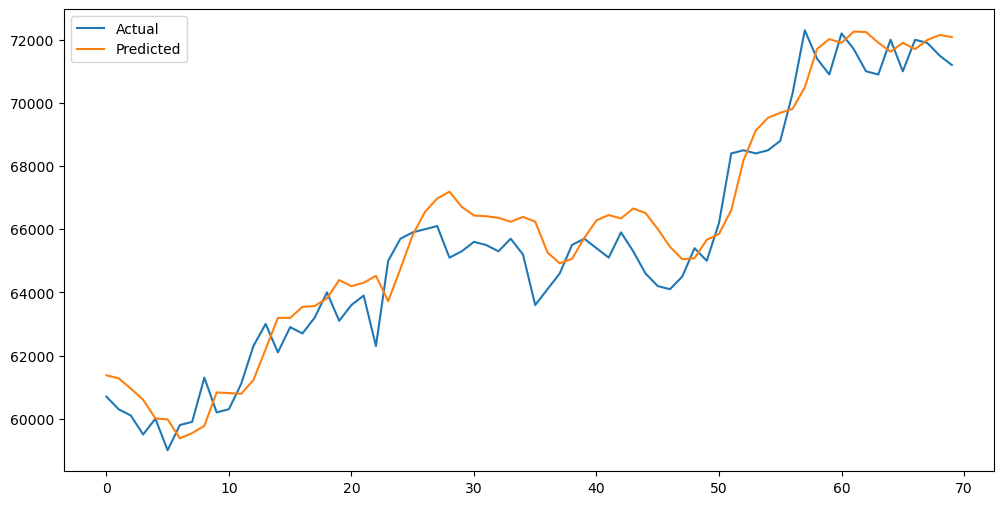

In [13]:
# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(test_y[0], label='Actual')
plt.plot(predictions[:, 0], label='Predicted')
plt.legend()
plt.show()

In [14]:
print(test_y)

[[60700. 60300. 60100. 59500. 60000. 59000. 59800. 59900. 61300. 60200.
  60300. 61100. 62300. 63000. 62100. 62900. 62700. 63200. 64000. 63100.
  63600. 63900. 62300. 65000. 65700. 65900. 66000. 66100. 65100. 65300.
  65600. 65500. 65300. 65700. 65200. 63600. 64100. 64600. 65500. 65700.
  65400. 65100. 65900. 65300. 64600. 64200. 64100. 64500. 65400. 65000.
  66200. 68400. 68500. 68400. 68500. 68800. 70300. 72300. 71400. 70900.
  72200. 71700. 71000. 70900. 72000. 71000. 72000. 71900. 71500. 71200.]]


In [15]:
print(train_x)

[[0.93729373 0.93729373 0.92079208 ... 0.87128713 0.87128713 0.85478548]
 [0.93729373 0.92079208 0.9339934  ... 0.87128713 0.85478548 0.89438944]
 [0.92079208 0.9339934  0.96369637 ... 0.85478548 0.89438944 0.88118812]
 ...
 [0.25742574 0.25412541 0.21782178 ... 0.26072607 0.26072607 0.27062706]
 [0.25412541 0.21782178 0.20792079 ... 0.26072607 0.27062706 0.28052805]
 [0.21782178 0.20792079 0.21782178 ... 0.27062706 0.28052805 0.27722772]]


In [21]:
X_test = [[0.91]]
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 272ms/step


In [22]:
print(y_pred)

[[0.54449946]]


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 512)               1052672   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 1,053,185
Trainable params: 1,053,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 3s 106ms/step - loss: 0.0494 - mae: 0.1474 - mape: 419660.0938
Epoch 2/100
12/12 [==============================] - 1s 109ms/step - loss: 0.0103 - mae: 0.0767 - mape: 458819.5000
Epoch 3/100
12/12 [==============================] - 1s 108ms/step - loss: 0

12/12 [==============================] - 1s 112ms/step - loss: 0.0020 - mae: 0.0349 - mape: 66160.2422
Epoch 65/100
12/12 [==============================] - 1s 113ms/step - loss: 0.0021 - mae: 0.0349 - mape: 116274.0703
Epoch 66/100
12/12 [==============================] - 1s 110ms/step - loss: 0.0018 - mae: 0.0330 - mape: 42530.2188
Epoch 67/100
12/12 [==============================] - 1s 111ms/step - loss: 0.0020 - mae: 0.0353 - mape: 35686.8906
Epoch 68/100
12/12 [==============================] - 1s 112ms/step - loss: 0.0015 - mae: 0.0310 - mape: 104987.9531
Epoch 69/100
12/12 [==============================] - 1s 112ms/step - loss: 0.0020 - mae: 0.0351 - mape: 107428.5781
Epoch 70/100
12/12 [==============================] - 1s 112ms/step - loss: 0.0018 - mae: 0.0342 - mape: 76169.8281
Epoch 71/100
12/12 [==============================] - 1s 112ms/step - loss: 0.0019 - mae: 0.0340 - mape: 82912.3906
Epoch 72/100
12/12 [==============================] - 1s 112ms/step - loss: 0.0016

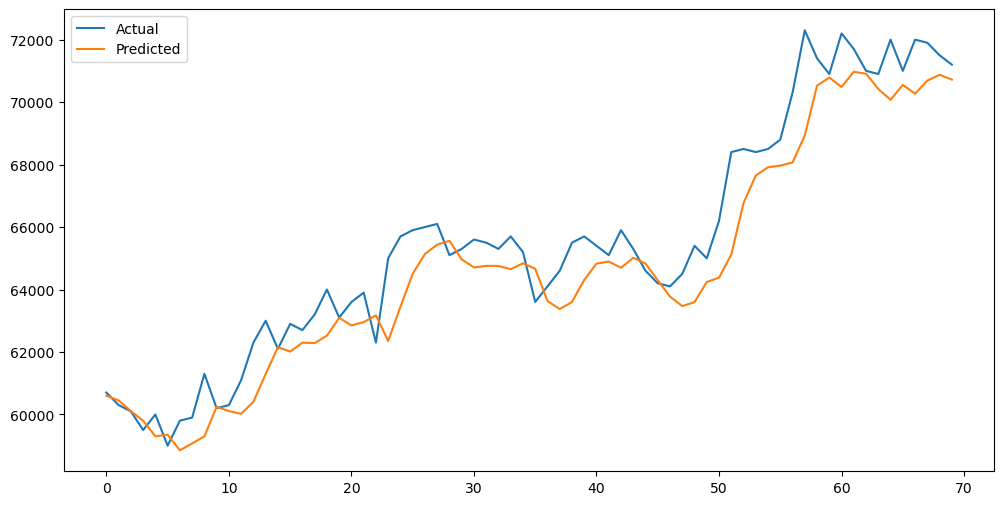

In [23]:
import pickle
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 데이터 로딩
data = pd.DataFrame({
    '날짜': ['2021.06.09', '2021.06.10', '2021.06.11', '2021.06.14', '2021.06.15', '2021.06.16', '2021.06.17', '2021.06.18', '2021.06.21', '2021.06.22', '2021.06.23', '2021.06.24', '2021.06.25', '2021.06.28', '2021.06.29', '2021.06.30', '2021.07.01', '2021.07.02', '2021.07.05', '2021.07.06', '2021.07.07', '2021.07.08', '2021.07.09', '2021.07.12', '2021.07.13', '2021.07.14', '2021.07.15', '2021.07.16', '2021.07.19', '2021.07.20', '2021.07.21', '2021.07.22', '2021.07.23', '2021.07.26', '2021.07.27', '2021.07.28', '2021.07.29', '2021.07.30', '2021.08.02', '2021.08.03', '2021.08.04', '2021.08.05', '2021.08.06', '2021.08.09', '2021.08.10', '2021.08.11', '2021.08.12', '2021.08.13', '2021.08.17', '2021.08.18', '2021.08.19', '2021.08.20', '2021.08.23', '2021.08.24', '2021.08.25', '2021.08.26', '2021.08.27', '2021.08.30', '2021.08.31', '2021.09.01', '2021.09.02', '2021.09.03', '2021.09.06', '2021.09.07', '2021.09.08', '2021.09.09', '2021.09.10', '2021.09.13', '2021.09.14', '2021.09.15', '2021.09.16', '2021.09.17', '2021.09.23', '2021.09.24', '2021.09.27', '2021.09.28', '2021.09.29', '2021.09.30', '2021.10.01', '2021.10.05', '2021.10.06', '2021.10.07', '2021.10.08', '2021.10.12', '2021.10.13', '2021.10.14', '2021.10.15', '2021.10.18', '2021.10.19', '2021.10.20', '2021.10.21', '2021.10.22', '2021.10.25', '2021.10.26', '2021.10.27', '2021.10.28', '2021.10.29', '2021.11.01', '2021.11.02', '2021.11.03', '2021.11.04', '2021.11.05', '2021.11.08', '2021.11.09', '2021.11.10', '2021.11.11', '2021.11.12', '2021.11.15', '2021.11.16', '2021.11.17', '2021.11.18', '2021.11.19', '2021.11.22', '2021.11.23', '2021.11.24', '2021.11.25', '2021.11.26', '2021.11.29', '2021.11.30', '2021.12.01', '2021.12.02', '2021.12.03', '2021.12.06', '2021.12.07', '2021.12.08', '2021.12.09', '2021.12.10', '2021.12.13', '2021.12.14', '2021.12.15', '2021.12.16', '2021.12.17', '2021.12.20', '2021.12.21', '2021.12.22', '2021.12.23', '2021.12.24', '2021.12.27', '2021.12.28', '2021.12.29', '2021.12.30', '2022.01.03', '2022.01.04', '2022.01.05', '2022.01.06', '2022.01.07', '2022.01.10', '2022.01.11', '2022.01.12', '2022.01.13', '2022.01.14', '2022.01.17', '2022.01.18', '2022.01.19', '2022.01.20', '2022.01.21', '2022.01.24', '2022.01.25', '2022.01.26', '2022.01.27', '2022.01.28', '2022.02.03', '2022.02.04', '2022.02.07', '2022.02.08', '2022.02.09', '2022.02.10', '2022.02.11', '2022.02.14', '2022.02.15', '2022.02.16', '2022.02.17', '2022.02.18', '2022.02.21', '2022.02.22', '2022.02.23', '2022.02.24', '2022.02.25', '2022.02.28', '2022.03.02', '2022.03.03', '2022.03.04', '2022.03.07', '2022.03.08', '2022.03.10', '2022.03.11', '2022.03.14', '2022.03.15', '2022.03.16', '2022.03.17', '2022.03.18', '2022.03.21', '2022.03.22', '2022.03.23', '2022.03.24', '2022.03.25', '2022.03.28', '2022.03.29', '2022.03.30', '2022.03.31', '2022.04.01', '2022.04.04', '2022.04.05', '2022.04.06', '2022.04.07', '2022.04.08', '2022.04.11', '2022.04.12', '2022.04.13', '2022.04.14', '2022.04.15', '2022.04.18', '2022.04.19', '2022.04.20', '2022.04.21', '2022.04.22', '2022.04.25', '2022.04.26', '2022.04.27', '2022.04.28', '2022.04.29', '2022.05.02', '2022.05.03', '2022.05.04', '2022.05.06', '2022.05.09', '2022.05.10', '2022.05.11', '2022.05.12', '2022.05.13', '2022.05.16', '2022.05.17', '2022.05.18', '2022.05.19', '2022.05.20', '2022.05.23', '2022.05.24', '2022.05.25', '2022.05.26', '2022.05.27', '2022.05.30', '2022.05.31', '2022.06.02', '2022.06.03', '2022.06.07', '2022.06.08', '2022.06.09', '2022.06.10', '2022.06.13', '2022.06.14', '2022.06.15', '2022.06.16', '2022.06.17', '2022.06.20', '2022.06.21', '2022.06.22', '2022.06.23', '2022.06.24', '2022.06.27', '2022.06.28', '2022.06.29', '2022.06.30', '2022.07.01', '2022.07.04', '2022.07.05', '2022.07.06', '2022.07.07', '2022.07.08', '2022.07.11', '2022.07.12', '2022.07.13', '2022.07.14', '2022.07.15', '2022.07.18', '2022.07.19', '2022.07.20', '2022.07.21', '2022.07.22', '2022.07.25', '2022.07.26', '2022.07.27', '2022.07.28', '2022.07.29', '2022.08.01', '2022.08.02', '2022.08.03', '2022.08.04', '2022.08.05', '2022.08.08', '2022.08.09', '2022.08.10', '2022.08.11', '2022.08.12', '2022.08.16', '2022.08.17', '2022.08.18', '2022.08.19', '2022.08.22', '2022.08.23', '2022.08.24', '2022.08.25', '2022.08.26', '2022.08.29', '2022.08.30', '2022.08.31', '2022.09.01', '2022.09.02', '2022.09.05', '2022.09.06', '2022.09.07', '2022.09.08', '2022.09.13', '2022.09.14', '2022.09.15', '2022.09.16', '2022.09.19', '2022.09.20', '2022.09.21', '2022.09.22', '2022.09.23', '2022.09.26', '2022.09.27', '2022.09.28', '2022.09.29', '2022.09.30', '2022.10.04', '2022.10.05', '2022.10.06', '2022.10.07', '2022.10.11', '2022.10.12', '2022.10.13', '2022.10.14', '2022.10.17', '2022.10.18', '2022.10.19', '2022.10.20', '2022.10.21', '2022.10.24', '2022.10.25', '2022.10.26', '2022.10.27', '2022.10.28', '2022.10.31', '2022.11.01', '2022.11.02', '2022.11.03', '2022.11.04', '2022.11.07', '2022.11.08', '2022.11.09', '2022.11.10', '2022.11.11', '2022.11.14', '2022.11.15', '2022.11.16', '2022.11.17', '2022.11.18', '2022.11.21', '2022.11.22', '2022.11.23', '2022.11.24', '2022.11.25', '2022.11.28', '2022.11.29', '2022.11.30', '2022.12.01', '2022.12.02', '2022.12.05', '2022.12.06', '2022.12.07', '2022.12.08', '2022.12.09', '2022.12.12', '2022.12.13', '2022.12.14', '2022.12.15', '2022.12.16', '2022.12.19', '2022.12.20', '2022.12.21', '2022.12.22', '2022.12.23', '2022.12.26', '2022.12.27', '2022.12.28', '2022.12.29', '2023.01.02', '2023.01.03', '2023.01.04', '2023.01.05', '2023.01.06', '2023.01.09', '2023.01.10', '2023.01.11', '2023.01.12', '2023.01.13', '2023.01.16', '2023.01.17', '2023.01.18', '2023.01.19', '2023.01.20', '2023.01.25', '2023.01.26', '2023.01.27', '2023.01.30', '2023.01.31', '2023.02.01', '2023.02.02', '2023.02.03', '2023.02.06', '2023.02.07', '2023.02.08', '2023.02.09', '2023.02.10', '2023.02.13', '2023.02.14', '2023.02.15', '2023.02.16', '2023.02.17', '2023.02.20', '2023.02.21', '2023.02.22', '2023.02.23', '2023.02.24', '2023.02.27', '2023.02.28', '2023.03.02', '2023.03.03', '2023.03.06', '2023.03.07', '2023.03.08', '2023.03.09', '2023.03.10', '2023.03.13', '2023.03.14', '2023.03.15', '2023.03.16', '2023.03.17', '2023.03.20', '2023.03.21', '2023.03.22', '2023.03.23', '2023.03.24', '2023.03.27', '2023.03.28', '2023.03.29', '2023.03.30', '2023.03.31', '2023.04.03', '2023.04.04', '2023.04.05', '2023.04.06', '2023.04.07', '2023.04.10', '2023.04.11', '2023.04.12', '2023.04.13', '2023.04.14', '2023.04.17', '2023.04.18', '2023.04.19', '2023.04.20', '2023.04.21', '2023.04.24', '2023.04.25', '2023.04.26', '2023.04.27', '2023.04.28', '2023.05.02', '2023.05.03', '2023.05.04', '2023.05.08', '2023.05.09', '2023.05.10', '2023.05.11', '2023.05.12', '2023.05.15', '2023.05.16', '2023.05.17', '2023.05.18', '2023.05.19', '2023.05.22', '2023.05.23', '2023.05.24', '2023.05.25', '2023.05.26', '2023.05.30', '2023.05.31', '2023.06.01', '2023.06.02', '2023.06.05', '2023.06.07', '2023.06.08', '2023.06.09', '2023.06.12', '2023.06.13', '2023.06.14', '2023.06.15', '2023.06.16'],
    '종가': [81100.0, 81000.0, 81000.0, 80500.0, 80900.0, 81800.0, 80900.0, 80500.0, 79900.0, 80000.0, 80100.0, 81200.0, 81600.0, 81900.0, 81000.0, 80700.0, 80100.0, 80000.0, 80400.0, 81200.0, 80800.0, 79900.0, 79400.0, 79700.0, 79800.0, 79500.0, 80600.0, 79800.0, 79000.0, 79000.0, 78500.0, 79700.0, 79300.0, 78800.0, 78500.0, 79200.0, 79000.0, 78500.0, 79300.0, 81400.0, 82900.0, 82100.0, 81500.0, 81500.0, 80200.0, 78500.0, 77000.0, 74400.0, 74200.0, 73900.0, 73100.0, 72700.0, 73300.0, 75600.0, 75700.0, 74600.0, 74300.0, 74600.0, 76700.0, 76800.0, 76000.0, 76600.0, 77300.0, 76100.0, 76300.0, 75300.0, 75300.0, 76300.0, 76600.0, 77000.0, 76100.0, 77200.0, 77400.0, 77300.0, 77700.0, 76300.0, 74100.0, 74100.0, 73200.0, 72200.0, 71300.0, 71600.0, 71500.0, 69000.0, 68800.0, 69400.0, 70100.0, 70200.0, 70600.0, 70300.0, 70200.0, 70400.0, 70200.0, 71100.0, 70100.0, 70700.0, 69800.0, 69900.0, 71500.0, 70400.0, 70600.0, 70200.0, 70600.0, 70500.0, 70200.0, 69900.0, 70600.0, 71400.0, 71300.0, 70700.0, 70200.0, 71200.0, 74900.0, 75300.0, 74800.0, 73700.0, 72300.0, 72300.0, 71300.0, 74400.0, 75800.0, 75600.0, 76300.0, 77400.0, 77400.0, 78200.0, 76900.0, 76800.0, 77000.0, 77600.0, 77800.0, 78000.0, 77100.0, 78100.0, 79400.0, 79900.0, 80500.0, 80200.0, 80300.0, 78800.0, 78300.0, 78600.0, 78700.0, 77400.0, 76900.0, 78300.0, 78000.0, 78900.0, 78900.0, 77900.0, 77300.0, 77500.0, 77000.0, 76300.0, 76500.0, 75600.0, 75100.0, 74000.0, 73300.0, 71300.0, 73300.0, 73300.0, 74000.0, 73000.0, 73500.0, 74700.0, 75400.0, 74900.0, 73700.0, 73700.0, 74800.0, 75000.0, 74300.0, 74200.0, 73400.0, 73000.0, 71500.0, 71900.0, 72100.0, 71700.0, 72900.0, 71500.0, 70100.0, 69500.0, 71200.0, 70000.0, 70200.0, 69500.0, 70400.0, 71200.0, 70700.0, 69900.0, 70300.0, 70500.0, 69800.0, 69800.0, 69700.0, 70200.0, 69900.0, 69600.0, 69100.0, 69300.0, 69200.0, 68500.0, 68000.0, 67800.0, 67900.0, 67000.0, 68700.0, 67500.0, 66600.0, 66700.0, 67300.0, 67400.0, 67700.0, 67000.0, 66300.0, 66100.0, 65000.0, 64800.0, 67400.0, 67300.0, 67500.0, 67900.0, 66500.0, 66100.0, 65700.0, 65700.0, 64900.0, 66500.0, 66300.0, 67600.0, 68100.0, 67500.0, 68000.0, 67900.0, 66500.0, 66400.0, 65900.0, 66500.0, 67700.0, 67400.0, 66700.0, 66800.0, 65500.0, 65300.0, 65200.0, 63800.0, 62100.0, 61900.0, 60700.0, 60900.0, 59800.0, 58700.0, 58500.0, 57600.0, 57400.0, 58400.0, 58800.0, 59400.0, 58000.0, 57000.0, 56200.0, 57100.0, 57200.0, 56400.0, 58200.0, 58700.0, 58800.0, 58100.0, 58000.0, 57500.0, 60000.0, 61900.0, 60900.0, 60500.0, 61800.0, 61300.0, 61100.0, 61700.0, 61800.0, 61900.0, 61400.0, 61300.0, 61700.0, 61300.0, 61500.0, 61500.0, 60800.0, 60000.0, 59100.0, 59900.0, 60200.0, 61000.0, 60400.0, 61500.0, 60900.0, 60000.0, 59100.0, 59000.0, 59700.0, 60000.0, 58600.0, 58800.0, 59700.0, 58400.0, 57500.0, 57100.0, 57100.0, 56000.0, 55600.0, 58100.0, 56800.0, 56000.0, 56200.0, 56400.0, 55800.0, 55300.0, 54400.0, 54500.0, 53900.0, 54200.0, 52900.0, 52600.0, 53100.0, 55200.0, 56000.0, 56300.0, 56200.0, 55400.0, 55800.0, 55200.0, 56300.0, 56600.0, 56500.0, 55800.0, 55500.0, 55900.0, 57500.0, 57700.0, 59400.0, 59500.0, 57300.0, 59400.0, 60000.0, 59600.0, 59200.0, 59400.0, 60200.0, 61800.0, 62000.0, 60400.0, 62900.0, 61900.0, 62400.0, 62700.0, 61400.0, 61800.0, 61400.0, 60600.0, 61000.0, 61400.0, 61000.0, 60100.0, 60600.0, 62200.0, 62600.0, 60400.0, 60300.0, 59200.0, 58900.0, 59200.0, 60400.0, 59500.0, 59700.0, 60500.0, 59300.0, 59500.0, 59500.0, 58600.0, 58000.0, 59100.0, 58100.0, 57900.0, 58100.0, 56600.0, 55300.0, 55500.0, 55400.0, 57800.0, 58200.0, 59000.0, 60700.0, 60400.0, 60500.0, 60500.0, 60800.0, 61100.0, 61000.0, 60400.0, 61500.0, 61800.0, 63400.0, 63900.0, 64600.0, 63300.0, 61000.0, 61800.0, 63500.0, 63800.0, 61600.0, 61900.0, 63100.0, 63000.0, 62800.0, 62900.0, 63200.0, 62200.0, 63700.0, 62600.0, 62700.0, 62100.0, 61100.0, 62000.0, 61300.0, 60500.0, 60600.0, 60800.0, 60500.0, 61500.0, 60700.0, 60300.0, 60100.0, 59500.0, 60000.0, 59000.0, 59800.0, 59900.0, 61300.0, 60200.0, 60300.0, 61100.0, 62300.0, 63000.0, 62100.0, 62900.0, 62700.0, 63200.0, 64000.0, 63100.0, 63600.0, 63900.0, 62300.0, 65000.0, 65700.0, 65900.0, 66000.0, 66100.0, 65100.0, 65300.0, 65600.0, 65500.0, 65300.0, 65700.0, 65200.0, 63600.0, 64100.0, 64600.0, 65500.0, 65700.0, 65400.0, 65100.0, 65900.0, 65300.0, 64600.0, 64200.0, 64100.0, 64500.0, 65400.0, 65000.0, 66200.0, 68400.0, 68500.0, 68400.0, 68500.0, 68800.0, 70300.0, 72300.0, 71400.0, 70900.0, 72200.0, 71700.0, 71000.0, 70900.0, 72000.0, 71000.0, 72000.0, 71900.0, 71500.0, 71200.0]
})

# 데이터 전처리
data['종가'] = data['종가'].shift(-1)  # 종가를 한 행씩 뒤로 Shift
data = data.dropna()  # NaN 값을 제거
prices = data['종가'].values  # 종가 데이터를 numpy 배열로 변환
prices = prices.reshape(-1, 1)  # 2차원 배열로 변환

# 데이터 분할
train_size = int(len(prices) * 0.8)  # 학습 데이터의 크기 설정
train_data = prices[:train_size]  # 학습 데이터
test_data = prices[train_size:]  # 테스트 데이터

# 데이터 스케일링
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# 학습 데이터 생성
def create_dataset(dataset, lookback):
    X, Y = [], []
    for i in range(len(dataset) - lookback):
        X.append(dataset[i:i + lookback, 0])
        Y.append(dataset[i + lookback, 0])
    return np.array(X), np.array(Y)

lookback = 30  # 입력 시퀀스의 길이 설정
train_x, train_y = create_dataset(train_data, lookback)
test_x, test_y = create_dataset(test_data, lookback)

# 모델 구조
model = Sequential()
model.add(LSTM(512, input_shape=(lookback, 1)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# 오차 및 최적화기 설정
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae', 'mape'])
model.summary()

# 모델 학습 (history = model.fit()을 수행한 결과로 가정)
history = model.fit(train_x, train_y, epochs=100, batch_size=32, verbose=1)

# 테스트 데이터에 대한 예측
predictions = model.predict(test_x)
predictions = scaler.inverse_transform(predictions)  # 스케일링 복원
test_y = scaler.inverse_transform([test_y])  # 스케일링 복원

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(test_y[0], label='Actual')
plt.plot(predictions[:, 0], label='Predicted')
plt.legend()
plt.show()